<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Cryto - Bitcoin - Calculate Support and resistance 
[<button class="lm-Widget p-Widget jupyter-widgets jupyter-button widget-button mod-primary">Open in Naas</button>](https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/CCXT/CCXT_Calculate_Support_and_Resistance.ipynb)

Prerequisite : get binance API Key

In [ ]:
pip install trendln matplotlib==3.1.3 --user

In [1]:
import naas
import ccxt
import pandas as pd
from datetime import datetime
import naas_drivers
import trendln

In [2]:
binance = ccxt.binance({
    'apiKey': naas.secret.get('binance_api'),
    'secret': naas.secret.get('binance_secret')
}) 
data = binance.fetch_ohlcv(symbol = 'BTC/USDT', limit = 180, timeframe = '4h')

In [3]:
df = pd.DataFrame(data, columns=["Date","Open","High","Low","Close","Volume"])
df['Date'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Date']]
df

,Date,Open,High,Low,Close,Volume
0,2020-12-30 13:00:00,27836.95,28291.82,27577.00,28153.76,11625.820706
1,2020-12-30 17:00:00,28153.75,28900.05,27887.00,28776.46,17159.483105
2,2020-12-30 21:00:00,28776.45,28996.00,28534.70,28875.54,11921.265433
3,2020-12-31 01:00:00,28875.55,29300.00,28120.67,29024.00,17005.770282
4,2020-12-31 05:00:00,29024.01,29285.00,28738.10,29155.25,10242.046375
...,...,...,...,...,...,...
175,2021-01-28 17:00:00,31926.49,32747.78,31650.00,32564.71,16889.869122
176,2021-01-28 21:00:00,32564.71,33783.98,32392.34,33364.86,18820.098006
177,2021-01-29 01:00:00,33368.18,34310.00,33330.93,33733.58,26746.707141
178,2021-01-29 05:00:00,33728.99,33934.48,31915.40,32266.35,28364.158989


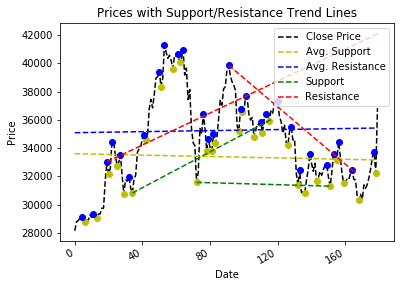

In [47]:
fig = trendln.plot_support_resistance(
    df[-1000:].Close, #as per h for calc_support_resistance
    xformatter = None, #x-axis data formatter turning numeric indexes to display output
      # e.g. ticker.FuncFormatter(func) otherwise just display numeric indexes
    numbest = 1, #number of best support and best resistance lines to display
    fromwindows = True, #draw numbest best from each window, otherwise draw numbest across whole range
    pctbound = 0.1, # bound trend line based on this maximum percentage of the data range above the high or below the low
    extmethod = trendln.METHOD_NUMDIFF,
    method=trendln.METHOD_PROBHOUGH,
    window=125,
    errpct = 0.005,
    hough_prob_iter=50,
    sortError=False,
    accuracy=1)


In [48]:
import plotly.tools as tls
import plotly.graph_objects as go

plotly_fig = tls.mpl_to_plotly(fig)

/opt/conda/lib/python3.8/site-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/opt/conda/lib/python3.8/site-packages/plotly/matplotlylib/renderer.py:547: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.

/opt/conda/lib/python3.8/site-packages/plotly/matplotlylib/renderer.py:409: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/opt/conda/lib/python3.8/site-packages/plotly/matplotlylib/renderer.py:511: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



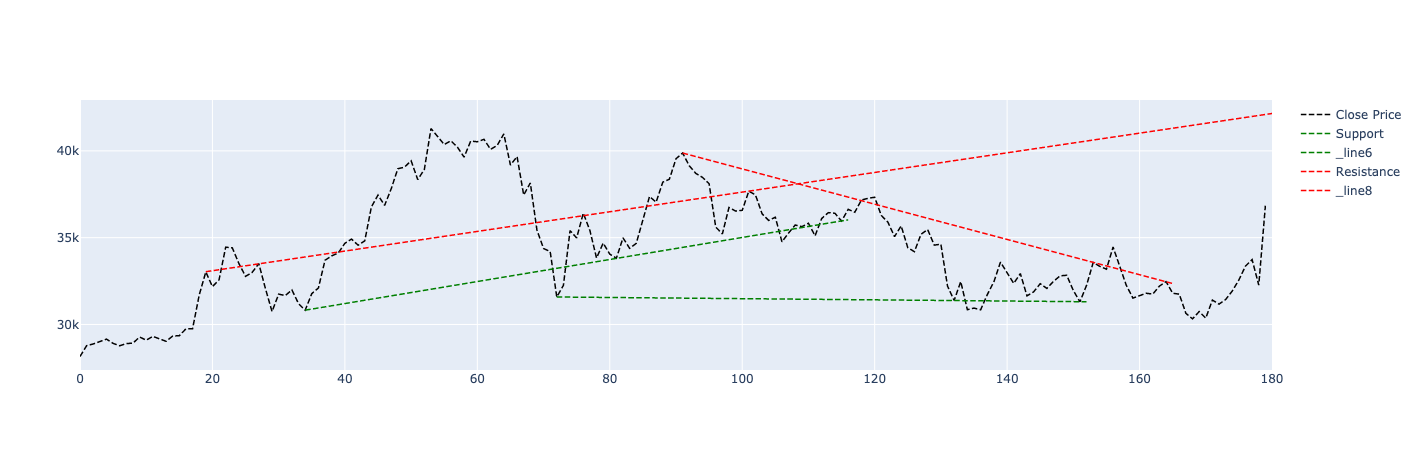

In [49]:
layout = dict(
    dragmode="pan",
    xaxis_rangeslider_visible=False,
    showlegend=True,
)
new_data = list(plotly_fig.data)
new_data.pop(2)
new_data.pop(2)
new_data.pop(1)
new_data.pop(1)
fig = go.Figure(data=new_data, layout=layout)
fig